Epoch 1/20


C:\Users\azwan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 - 4s - 61ms/step - accuracy: 0.3482 - loss: 1.9350 - val_accuracy: 0.6070 - val_loss: 1.3312
Epoch 2/20
65/65 - 1s - 8ms/step - accuracy: 0.6527 - loss: 1.0655 - val_accuracy: 0.7686 - val_loss: 0.6416
Epoch 3/20
65/65 - 1s - 8ms/step - accuracy: 0.8300 - loss: 0.5634 - val_accuracy: 0.8734 - val_loss: 0.4104
Epoch 4/20
65/65 - 1s - 8ms/step - accuracy: 0.8805 - loss: 0.3974 - val_accuracy: 0.8996 - val_loss: 0.3071
Epoch 5/20
65/65 - 1s - 8ms/step - accuracy: 0.9267 - loss: 0.2431 - val_accuracy: 0.9170 - val_loss: 0.2351
Epoch 6/20
65/65 - 1s - 8ms/step - accuracy: 0.9354 - loss: 0.2276 - val_accuracy: 0.9389 - val_loss: 0.2082
Epoch 7/20
65/65 - 1s - 8ms/step - accuracy: 0.9432 - loss: 0.1971 - val_accuracy: 0.9301 - val_loss: 0.2281
Epoch 8/20
65/65 - 1s - 8ms/step - accuracy: 0.9514 - loss: 0.1611 - val_accuracy: 0.9432 - val_loss: 0.1754
Epoch 9/20
65/65 - 1s - 8ms/step - accuracy: 0.9539 - loss: 0.1413 - val_accuracy: 0.9651 - val_loss: 0.1751
Epoch 10/20
65/65 - 1s - 8ms/

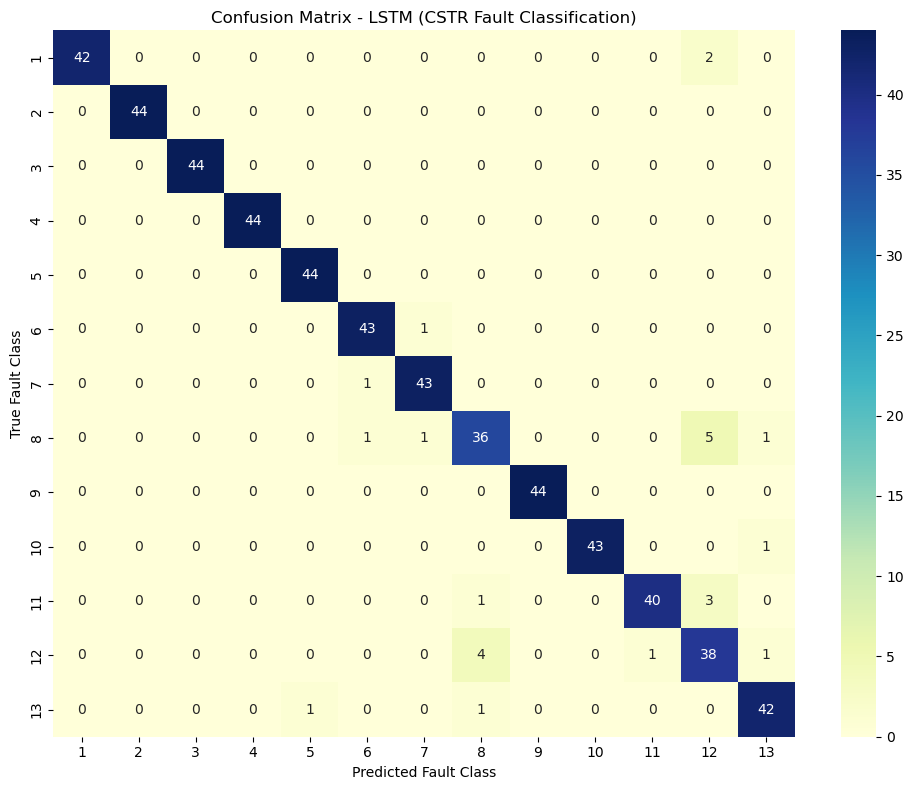

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load dataset
df = pd.read_csv('cstr_data.csv')
X = df.iloc[:, :-4].values
y = df.iloc[:, -4].values

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reshape for LSTM: (samples, timesteps, features_per_step)
timesteps = 10
features_per_step = X_scaled.shape[1] // timesteps
X_reshaped = X_scaled.reshape(-1, timesteps, features_per_step)

# 4. Encode labels
num_classes = len(np.unique(y))
y_adjusted = y - 1  # If classes start from 1
y_cat = to_categorical(y_adjusted, num_classes)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_cat, test_size=0.2, stratify=y, random_state=42
)

# 6. Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(timesteps, features_per_step)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=2)

# 8. Predict and evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) + 1
y_true = np.argmax(y_test, axis=1) + 1
print("Classification Report (LSTM):\n")
print(classification_report(y_true, y_pred, digits=4))

# 9. Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(1, num_classes+1), yticklabels=range(1, num_classes+1))
plt.xlabel("Predicted Fault Class")
plt.ylabel("True Fault Class")
plt.title("Confusion Matrix - LSTM (CSTR Fault Classification)")
plt.tight_layout()
plt.show()
